In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("data/terrain.csv")

We are going to identify if a car should go slow or fast based on two variables.
- bumpiness
- grade

In [4]:
df.head()

,bumpiness,grade,target
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0


0 = Fast <br>
1 = Slow

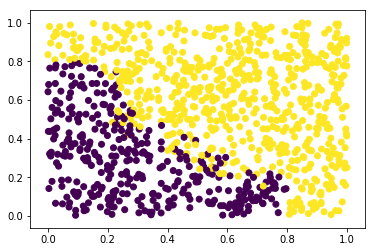

In [11]:
plt.scatter(df['bumpiness'], df['grade'], c=df['target'])
plt.show()

## K-nearest Neighbors

We will try to predict the optimus value based on the closest value to that point

In [3]:
# select features/target for our model
X = df[["bumpiness","grade"]].values
y = df["target"]

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
clf = KNeighborsClassifier(n_neighbors=1) # it selects 5 neighbors by default

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
accuracy_score(y_test, clf.predict(X_test))

0.9303030303030303

In [24]:
clf.score(X_test, y_test) # we can also use this method to calculate accuracy

0.9303030303030303

In [ ]:
# as the accuracy is too high we will use cross_val_score to ensure that its right
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(clf, X, y) 

array([0.9251497 , 0.92215569, 0.94277108])

In [29]:
cross_val_score(clf, X, y).mean()

0.9300254911863021

Now we will try to find the 'K' value that gives us the best accuracy

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
clf2 = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1), 
                    param_grid={"n_neighbors": np.arange(1,50)},
                    scoring='accuracy')

In [42]:
clf2.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
clf2.best_params_

{'n_neighbors': 18}

In [49]:
clf2.score(X_test, y_test)

0.9575757575757575

In [53]:
cross_val_score(clf2, X, y, cv=5).mean()

0.9509840246006152

As it can be seen the accuracy has gone up from 93% to 95% after using k=18